# Обучение нейрона с помощью функции потерь LogLoss

<h3 style="text-align: center;"><b>Нейрон с сигмоидой</b></h3>

Снова рассмотрим нейрон с сигмоидой, то есть $$f(x) = \sigma(x)=\frac{1}{1+e^{-x}}$$ 

Ранее мы установили, что **обучение нейрона с сигмоидой с квадратичной функцией потерь**:  

$$MSE(w, x) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (\sigma(w \cdot x_i) - y_i)^2$$    

где $w \cdot x_i$ - скалярное произведение, а $\sigma(w \cdot x_i) =\frac{1}{1+e^{-w \cdot x_i}} $ - сигмоида -- **неэффективно**, то есть мы увидели, что даже за большое количество итераций нейрон предсказывает плохо.

Давайте ещё раз взглянем на формулу для градиентного спуска от функции потерь $MSE$ по весам нейрона:

$$ \frac{\partial MSE}{\partial w} = \frac{1}{n} X^T (\sigma(w \cdot X) - y)\sigma(w \cdot X)(1 - \sigma(w \cdot X))$$

А теперь смотрим на график сигмоиды:

<img src="https://cdn-images-1.medium.com/max/1200/1*IDAnCFoeXqWL7F4u9MJMtA.png" width=500px height=350px>

**Её значения: числа от 0 до 1.**

Если получше проанализировать формулу, то теперь можно заметить, что, поскольку сигмоида принимает значения между 0 и 1 (а значит (1-$\sigma$) тоже принимает значения от 0 до 1), то мы умножаем $X^T$ на столбец $(\sigma(w \cdot X) - y)$ из чисел от -1 до 1, а потом ещё на столбцы $\sigma(w \cdot X)$ и $(1 - \sigma(w \cdot X))$ из чисел от 0 до 1. Таким образом в лучшем случае $\frac{\partial{Loss}}{\partial{w}}$ будет столбцом из чисел, порядок которых максимум 0.01 (в среднем, понятно, что если сигмоида выдаёт все 0, то будет 0, если все 1, то тоже 0). После этого мы умножаем на шаг градиентного спуска, который обычно порядка 0.001 или 0.1 максимум. То есть мы вычитаем из весов числа порядка ~0.0001. Медленновато спускаемся, не правда ли? Это называют **проблемой затухающих градиентов**.

Чтобы избежать эту проблему в задачах классификации, в которых моделью является нейрон с сигмоидной функцией активации, предсказывающий "вероятности" принадлженостей к классамиспользуют **LogLoss**:  

$$J(\hat{y}, y) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\sigma(w \cdot x_i)) + (1 - y_i) \log(1 - \sigma(w \cdot x_i))$$

где, как и прежде, $y$ - столбец $(n, 1)$ из истинных значений классов, а $\hat{y}$ - столбец $(n, 1)$ из предсказаний нейрона.

In [47]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
import pandas as pd
from sklearn.linear_model import Perceptron as skPerceptron
from sklearn.metrics import accuracy_score

In [48]:
def loss(y_pred, y):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

Отметим, что сейчас речь идёт именно о **бинарной классификации (на два класса)**, в многоклассовой классификации используется функция потерь под названием *кросс-энтропия*, которая является обобщением LogLoss'а на случай нескольких классов.

Почему же теперь всё будет лучше? Раньше была проблема умножения маленьких чисел в градиенте. Давайте посмотрим, что теперь:

* Для веса $w_j$:

$$ \frac{\partial Loss}{\partial w_j} = $$
$$ -\frac{1}{n} \sum_{i=1}^n \left(\frac{y_i}{\sigma(w \cdot x_i)} - \frac{1 - y_i}{1 - \sigma(w \cdot x_i)}\right)(\sigma(w \cdot x_i))_{w_j}' = -\frac{1}{n} \sum_{i=1}^n \left(\frac{y_i}{\sigma(w \cdot x_i)} - \frac{1 - y_i}{1 - \sigma(w \cdot x_i)}\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{ij} = $$
$$-\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{ij}$$

* Градиент $Loss$'а по вектору весов -- это вектор, $j$-ая компонента которого равна $\frac{\partial Loss}{\partial w_j}$ (помним, что весов всего $m$):

$$\begin{align}
    \frac{\partial Loss}{\partial w} &= \begin{bmatrix}
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{i1} \\
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{i2} \\
           \vdots \\
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{im}
         \end{bmatrix}
\end{align}=
$$\frac{1}{n} X^T \left(\hat{y} - y\right)$$

По аналогии с $w_j$ выведите формулу для свободного члена (bias'а) $b$ .

$$ \frac{\partial Loss}{\partial w_0} = $$
$$ -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)$$

Получили новое правило для обновления $w$ и $b$. 

In [49]:
def sigmoid(x):
    """Сигмоидальная функция"""
    return 1 / (1 + np.exp(-x))

Реализуйте нейрон с функцией потерь LogLoss:

In [50]:
class Neuron:

    def __init__(self, w=None, b=0):
        self.w = w
        self.b = b

    def activate(self, x):
        return sigmoid(x)

    def predict_proba(self, X):
        return self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)

    def backward_pass(self, X, y, y_pred, learning_rate=0.1):
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        self.w = self.w - learning_rate * (X.T @ (y_pred - y) / n)
        self.b = self.b - learning_rate * np.mean(y_pred - y)

    def predict(self, X):
        return np.round(self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b))

    def fit(self, X, y, num_epochs=5000):
        self.w = np.random.standard_normal((X.shape[1], 1))
        self.b = 0
        loss_values = []

        for i in range(num_epochs):
            y_pred = self.predict_proba(X)
            loss_values.append(loss(y_pred, y))
            self.backward_pass(X, y, y_pred)

        return loss_values

<h3 style="text-align: center;"><b>Тестирование</b></h3>

Протестируем нейрон, обученный с новой функцией потерь, на тех же данных, что и в предыдущем ноутбуке:

**Проверка forward_pass()**

In [51]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = Neuron(w, b)
y_pred = neuron.predict_proba(X)
print("y_pred = " + str(y_pred))

y_pred = [[0.99987661]
 [0.99999386]
 [0.00449627]]


**Проверка backward_pass()**

In [52]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [53]:
neuron.backward_pass(X, y, y_pred)

print("w = " + str(neuron.w))
print("b = " + str(neuron.b))

w = [[0.9001544 ]
 [1.76049276]]
b = 1.9998544421863216


Проверьте на наборах данных "яблоки и груши" и "голос".

In [54]:
data_apples = pd.read_csv(filepath_or_buffer="apples_pears.csv")
data_apples.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


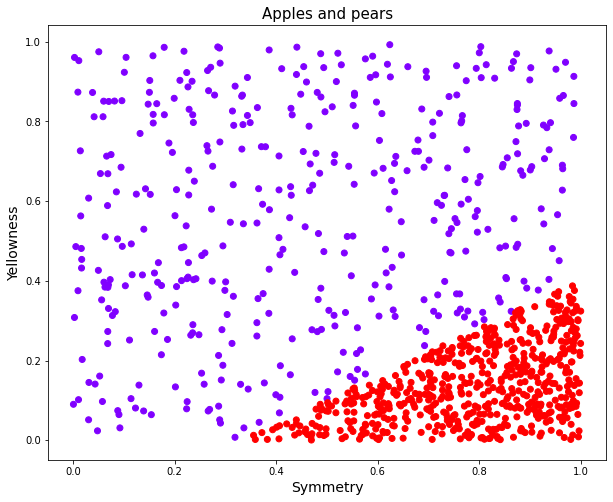

In [55]:
plt.figure(figsize=(10, 8))
plt.scatter(data_apples.iloc[:, 0], data_apples.iloc[:, 1], c=data_apples['target'], cmap='rainbow')
plt.title('Apples and pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellowness', fontsize=14)
plt.show();

In [56]:
X = data_apples.iloc[:, :2].values  # матрица объекты-признаки
y = data_apples['target'].values.reshape((-1, 1))

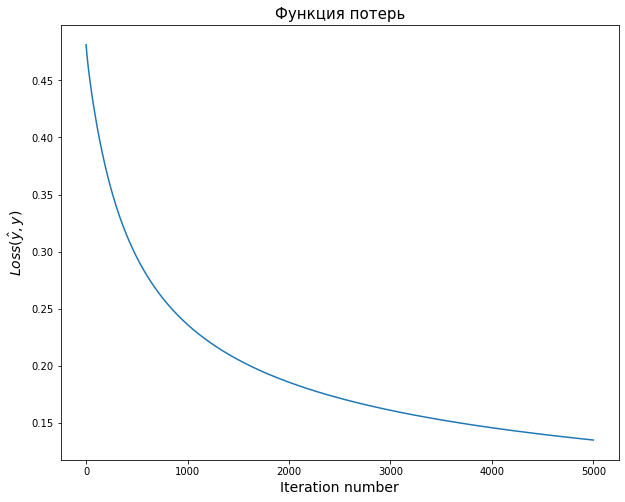

Wall time: 774 ms


In [57]:
%%time
neuron = Neuron()
losses = neuron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('Iteration number', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

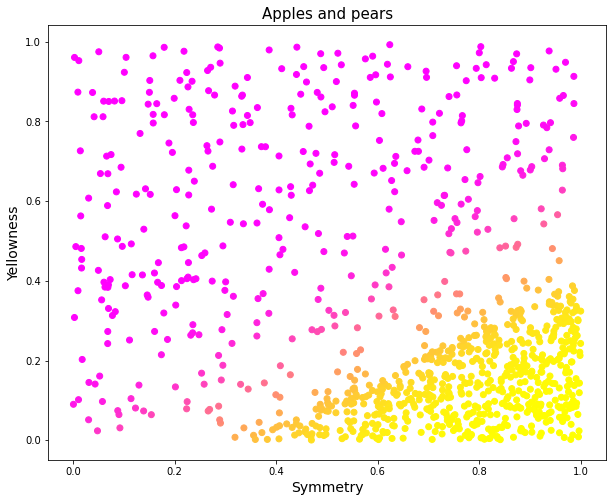

In [58]:
plt.figure(figsize=(10, 8))
plt.scatter(data_apples.iloc[:, 0], data_apples.iloc[:, 1], c=neuron.predict_proba(X).ravel(), cmap='spring')
plt.title('Apples and pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellowness', fontsize=14)
plt.show();

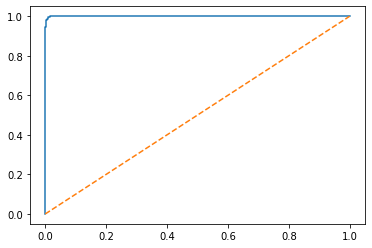

In [59]:
fpr, tpr, _ = roc_curve(y, neuron.predict_proba(X))
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1), np.linspace(0, 1), linestyle='--')

In [60]:
print(accuracy_score(y, neuron.predict(X)))

0.956


In [61]:
data_voices = pd.read_csv("voice.csv")
data_voices.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [62]:
encoding = {"male": 0, "female": 1}
y_voices = data_voices['label'].replace(encoding)
X_voices = data_voices.drop('label', axis=1)
scaler = StandardScaler()
X_voices = scaler.fit_transform(X_voices)
X_train, X_test, y_train, y_test = train_test_split(np.array(X_voices), np.array(y_voices))


In [63]:
neuron = Neuron()
neuron.fit(X_train, y_train)
print(accuracy_score(y_test, neuron.predict(X_test)))

0.9621212121212122


# Нейрон с различными функциями активации

В этом задании нужно будет:
- самостоятельно реализовать класс **`Neuron()`** с различными функциями активации (ReLU, LeakyReLU и ELU)

- обучить и протестировать этот класс на сгенерированных и реальных данных

**Достаточно реализовать ReLU и ещё одну из двух.**

In [64]:
def Loss(y_pred, y):
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    return 0.5 * np.mean((y_pred - y) ** 2)

In [65]:
def relu(x):
    return np.maximum(0, x)

In [66]:
def relu_derivative(x):
    return 1 if x > 0 else 0

In [67]:
class NeuronReLU:
    def __init__(self, w=None, b=0):
        self.w = w
        self.b = b

    def activate(self, x):
        return relu(x)

    def forward_pass(self, X):
        return self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)

    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        self.w = self.w - learning_rate * (X.T @ (y_pred - y) / n)
        self.b = self.b - learning_rate * np.mean(y_pred - y)

    def fit(self, X, y, num_epochs=10000):
        self.w = np.random.standard_normal((X.shape[1], 1))
        self.b = 0
        loss_values = []
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            loss_values.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)

        return loss_values

    def predict(self, X):
        return np.array(self.forward_pass(X) > 0.5, dtype=np.int64)

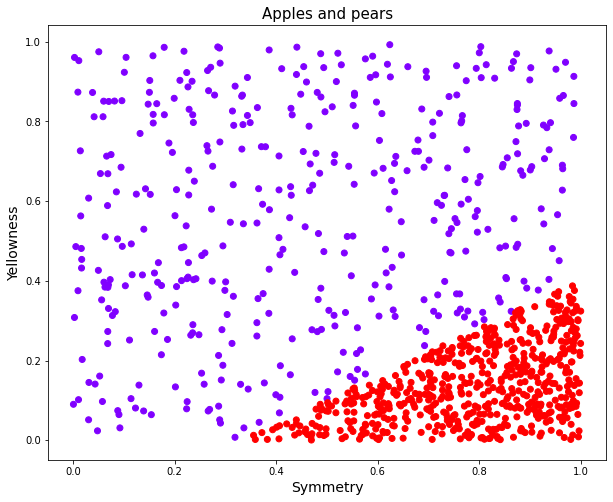

In [68]:
plt.figure(figsize=(10, 8))
plt.scatter(data_apples.iloc[:, 0], data_apples.iloc[:, 1], c=data_apples['target'], cmap='rainbow')
plt.title('Apples and pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellowness', fontsize=14)
plt.show();

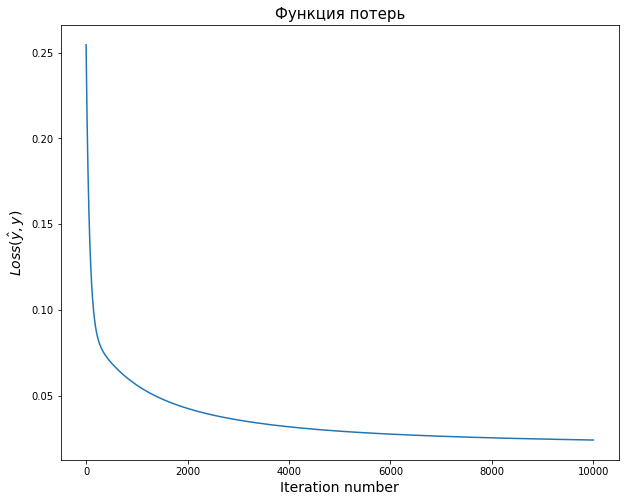

Wall time: 1.16 s


In [79]:
%%time
neuron = NeuronReLU()
losses = neuron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('Iteration number', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

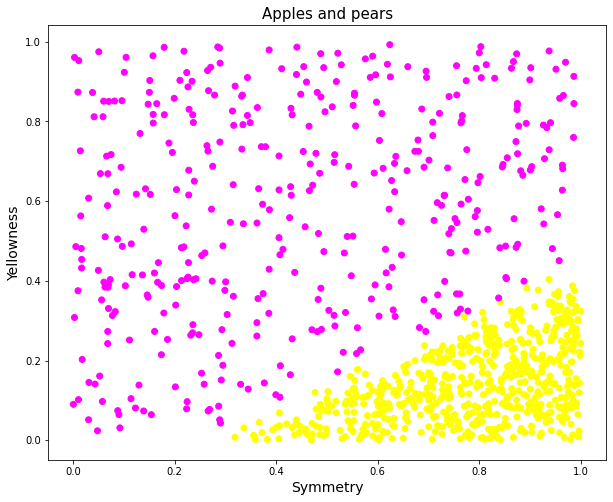

In [70]:
plt.figure(figsize=(10, 8))
plt.scatter(data_apples.iloc[:, 0], data_apples.iloc[:, 1], c=neuron.predict(X), cmap='spring')
plt.title('Apples and pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellowness', fontsize=14)
plt.show();

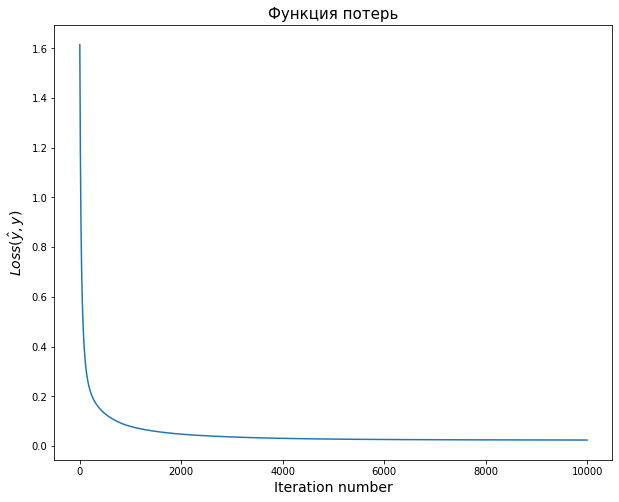

0.9633838383838383


In [71]:
neuron = NeuronReLU()

losses = neuron.fit(X_train, y_train)
plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('Iteration number', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()
print(accuracy_score(y_test,neuron.predict(X_test)))


In [72]:
def leaky_relu(x, alpha=0.01):
    return np.vectorize(lambda x: x if x>0 else alpha*x)(x)

In [73]:
def leaky_relu_derivative(x, alpha=0.01):
    return np.vectorize(lambda x: 1 if x>0 else alpha)(x)

In [74]:
class NeuronLeakyReLU:
    def __init__(self, w=None, b=0):
        self.w = w
        self.b = b

    def activate(self, x):
        return leaky_relu(x)

    def forward_pass(self, X):
        return self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)

    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        self.w = self.w - learning_rate * (X.T @ (y_pred - y) / n)
        self.b = self.b - learning_rate * np.mean(y_pred - y)

    def fit(self, X, y, num_epochs=10000):
        self.w = np.random.standard_normal((X.shape[1], 1))
        self.b = 0
        loss_values = []
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            loss_values.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)

        return loss_values

    def predict(self, X):
        return np.array(self.forward_pass(X) > 0.5, dtype=np.int64)

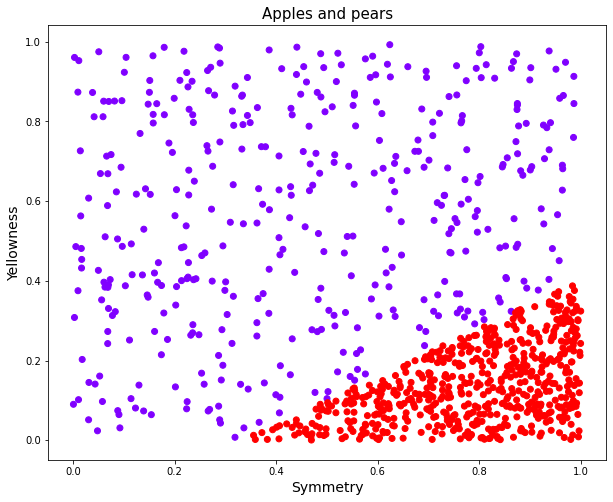

In [75]:
plt.figure(figsize=(10, 8))
plt.scatter(data_apples.iloc[:, 0], data_apples.iloc[:, 1], c=data_apples['target'], cmap='rainbow')
plt.title('Apples and pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellowness', fontsize=14)
plt.show();

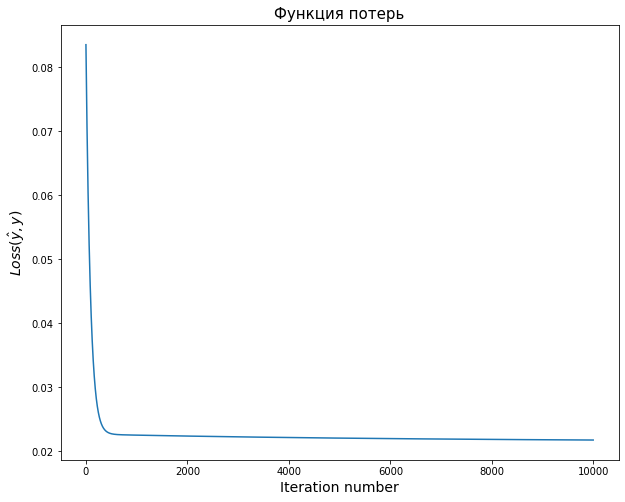

Wall time: 3.45 s


In [76]:
%%time
neuron = NeuronLeakyReLU()
losses = neuron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('Iteration number', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

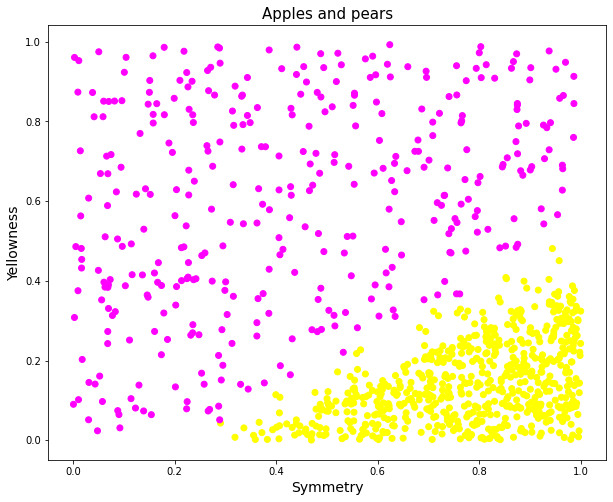

In [77]:
plt.figure(figsize=(10, 8))
plt.scatter(data_apples.iloc[:, 0], data_apples.iloc[:, 1], c=neuron.predict(X), cmap='spring')
plt.title('Apples and pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellowness', fontsize=14)
plt.show();

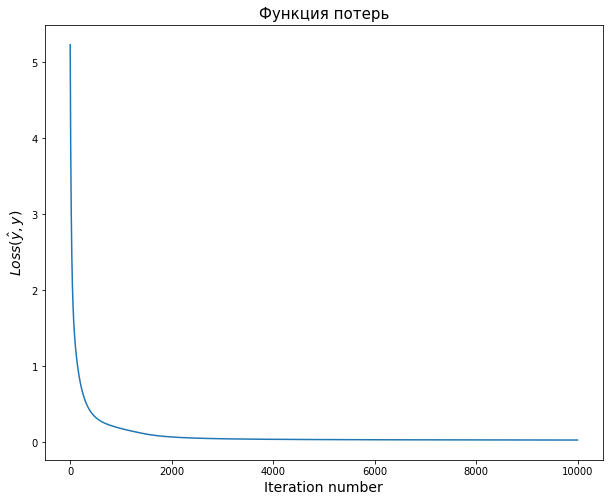

0.9444444444444444


In [78]:
neuron = NeuronLeakyReLU()

losses = neuron.fit(X_train, y_train)
plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('Iteration number', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()
print(accuracy_score(y_test,neuron.predict(X_test)))
